Database realizado por mi, basado en un aforador automatico de vehículos 24 horas.  
SITE_NUMBER: Codigo de la ubicación  
SERIAL_NUMBER: id unico de lectura  
DATE: fecha de la lectura  
TimeString: hora de lectura del día  
LANE: id de dirección de carril
DIRECTION: nombre de la dirección  
SPEED: velocidad de aforo en m/s   
CLASS: clase de vehiculo segun clase y ejes  
GROSS: peso de vehiculo aforado en kg  
AXLES: numero de ejes 

In [23]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Limpieza de datos

In [24]:
# Cargar el dataset

csv_file = r'C:\Users\ANDRES\Cursos\Curso de Python para Ciencia de Datos\BD.csv'
columnas = ['SITE_NUMBER','SERIAL_NUMBER', 'DATE', 'TimeString','LANE','DIRECTION','SPEED','CLASS','GROSS', 'AXLES']

df = pd.read_csv(csv_file, encoding="ISO-8859-1", delimiter=";", usecols=columnas)

df

,SITE_NUMBER,SERIAL_NUMBER,DATE,TimeString,LANE,DIRECTION,SPEED,CLASS,AXLES,GROSS
0,10276,513124,5/11/2023 0:00,00:24:56:988,1,NORTHBOUND,82,P,2,1239
1,10276,513125,5/11/2023 0:00,00:25:11:211,1,NORTHBOUND,72,A,2,1869
2,10276,513126,5/11/2023 0:00,00:25:16:448,1,NORTHBOUND,77,P,2,2917
3,10276,513127,5/11/2023 0:00,00:25:25:233,2,SOUTHBOUND,62,P,2,2019
4,10276,513128,5/11/2023 0:00,00:25:34:346,2,SOUTHBOUND,72,P,2,2006
...,...,...,...,...,...,...,...,...,...,...
537250,10276,387294,27/10/2023 0:00,23:58:44:169,1,NORTHBOUND,50,P,2,807
537251,10276,387295,27/10/2023 0:00,23:58:45:418,1,NORTHBOUND,49,P,2,1526
537252,10276,387296,27/10/2023 0:00,23:58:54:243,1,NORTHBOUND,60,C2-1,2,4294
537253,10276,387297,27/10/2023 0:00,23:58:58:007,1,NORTHBOUND,62,P,2,3122


### Revisión de datos

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537255 entries, 0 to 537254
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SITE_NUMBER    537255 non-null  int64 
 1   SERIAL_NUMBER  537255 non-null  int64 
 2   DATE           537255 non-null  object
 3   TimeString     537255 non-null  object
 4   LANE           537255 non-null  int64 
 5   DIRECTION      537255 non-null  object
 6   SPEED          537255 non-null  int64 
 7   CLASS          537255 non-null  object
 8   AXLES          537255 non-null  int64 
 9   GROSS          537255 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 41.0+ MB
None


Se procede a cambiar los tipos de datos para que coincidan con la DB

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y %H:%M') # Cambia la columna DATE a formato de fecha de pandas

In [4]:
df['TimeString']

0         00:24:56:988
1         00:25:11:211
2         00:25:16:448
3         00:25:25:233
4         00:25:34:346
              ...     
537250    23:58:44:169
537251    23:58:45:418
537252    23:58:54:243
537253    23:58:58:007
537254    23:59:46:343
Name: TimeString, Length: 537255, dtype: object

El formato de tiempo de los milisegundos de la columna de TimeString no es compatible con pandas, definimos una funcion para cambiar el formato y hacerlo compatible

In [5]:
def replace_tercer_colon(text):
    parts = text.split(':')
    if len(parts) > 2:
        return ':'.join(parts[:2] + ['.'.join(parts[2:])])
    return text

In [6]:
df['TimeString'] = df['TimeString'].apply(replace_tercer_colon) # Se aplica función para cambiar el formato de tiempo

In [7]:
df['TimeString']

0         00:24:56.988
1         00:25:11.211
2         00:25:16.448
3         00:25:25.233
4         00:25:34.346
              ...     
537250    23:58:44.169
537251    23:58:45.418
537252    23:58:54.243
537253    23:58:58.007
537254    23:59:46.343
Name: TimeString, Length: 537255, dtype: object

In [8]:
df['TimeString'] = pd.to_timedelta(df['TimeString']) 

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537255 entries, 0 to 537254
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   SITE_NUMBER    537255 non-null  int64          
 1   SERIAL_NUMBER  537255 non-null  int64          
 2   DATE           537255 non-null  datetime64[ns] 
 3   TimeString     537255 non-null  timedelta64[ns]
 4   LANE           537255 non-null  int64          
 5   DIRECTION      537255 non-null  object         
 6   SPEED          537255 non-null  int64          
 7   CLASS          537255 non-null  object         
 8   AXLES          537255 non-null  int64          
 9   GROSS          537255 non-null  int64          
dtypes: datetime64[ns](1), int64(6), object(2), timedelta64[ns](1)
memory usage: 41.0+ MB
None


In [10]:
print(df.head()) # Primeros cinco datos registrados

   SITE_NUMBER  SERIAL_NUMBER       DATE             TimeString  LANE  \
0        10276         513124 2023-11-05 0 days 00:24:56.988000     1   
1        10276         513125 2023-11-05 0 days 00:25:11.211000     1   
2        10276         513126 2023-11-05 0 days 00:25:16.448000     1   
3        10276         513127 2023-11-05 0 days 00:25:25.233000     2   
4        10276         513128 2023-11-05 0 days 00:25:34.346000     2   

    DIRECTION  SPEED CLASS  AXLES  GROSS  
0  NORTHBOUND     82     P      2   1239  
1  NORTHBOUND     72     A      2   1869  
2  NORTHBOUND     77     P      2   2917  
3  SOUTHBOUND     62     P      2   2019  
4  SOUTHBOUND     72     P      2   2006  


In [11]:
print(df.describe()) # descripción estadística básica del df

       SITE_NUMBER  SERIAL_NUMBER                           DATE  \
count     537255.0  537255.000000                         537255   
mean       10276.0  323661.536535  2023-10-23 19:14:26.665549824   
min        10276.0   40790.000000            2023-10-07 00:00:00   
25%        10276.0  186959.500000            2023-10-15 00:00:00   
50%        10276.0  321294.000000            2023-10-24 00:00:00   
75%        10276.0  466562.500000            2023-11-02 00:00:00   
max        10276.0  600879.000000            2023-11-10 00:00:00   
std            0.0  160145.474188                            NaN   

                      TimeString           LANE          SPEED          AXLES  \
count                     537255  537255.000000  537255.000000  537255.000000   
mean   0 days 12:45:23.789871370       1.458043      59.121935       2.097734   
min       0 days 00:00:00.570000       1.000000       3.000000       0.000000   
25%       0 days 08:39:24.721500       1.000000      52.000000 

In [12]:
df.isnull().sum()

SITE_NUMBER      0
SERIAL_NUMBER    0
DATE             0
TimeString       0
LANE             0
DIRECTION        0
SPEED            0
CLASS            0
AXLES            0
GROSS            0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

### Revisión de la veracidad de los datos de clase

Para los aforos vehiculares es importante saber que tipo de vehiculo pasa para ser registrado, por ello el aforador automatico realiza la clasificación automática, y toma valores de peso del vehiculo y el número de ejes del vehiculo. En reunión se definio que se clasificara los datos en 14 clases de vehículos.

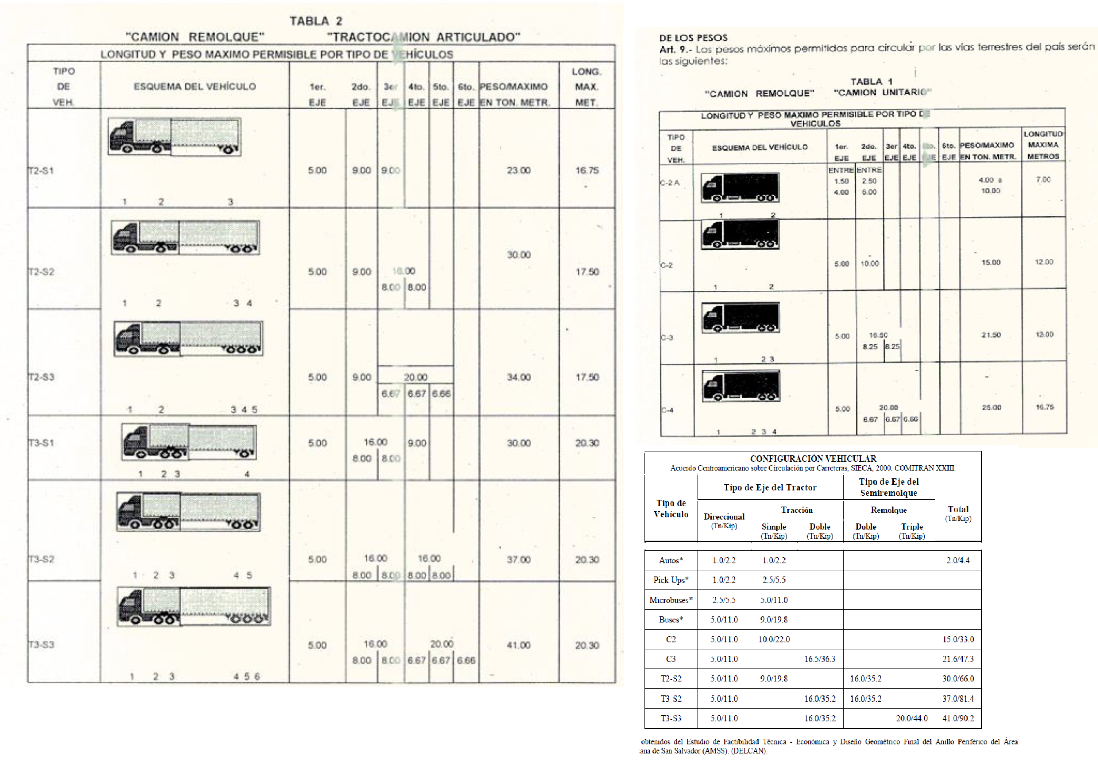

In [14]:
class_count = df['CLASS'].value_counts()
print(class_count)

CLASS
P        256441
A        170298
M         45155
C2-1      19312
2N        13448
T3-S2      8638
C3         6716
B2-2       4893
T3-S3      4878
3N         1421
4N         1368
ERROR      1152
B2-1        893
MB          731
C2-3        678
B3          243
6N          235
T3-S4       170
5N          134
C4          117
C2-2        102
T2-S1        91
7N           37
T3-S1        30
C3-R2        29
8N           17
C2-R2        11
9N            6
UC            4
T2-S2         4
T2-S3         2
10N           1
Name: count, dtype: int64


In [20]:
df['CLASS'].nunique()

32

Hay 32 clases unicas de la columna CLASS, como se acordo en reunión se debe reclasificar. La clasificación se va realizar de la siguiente forma:  
Vehiculo | Peso | Ejes  
Motos > 350  
Autos > 2000  
Pick-up > 2500  
MicroBus > 5000  
Bus > 9000  
C2-1 > 15000  
C3 > 21600  
C4 > 25000  
T2-S1 > 28000  
T2-S2 > 30000  
T3-S1 > 30000 5 ejes  
T2-S3 > 34000  
T3-S2 > 37000  
T3-S3 < 37000   
Configuracion con peso igual a 0 o cualquier otra config se clasifica como ERROR

In [15]:
def vehicle_configuration(weight, axes):
    if weight == 0:
        return 'ERROR'
    
    configurations = [
        (350, 'M'),
        (2000, 'A'),
        (2500, 'P'),
        (5000, 'MB'),
        (9000, 'B2-1'),
        (15000, 'C2-1'),
        (21600, 'C3'),
        (25000, 'C4'),
        (28000, 'T2-S1'),
        (30000, 'T2-S2'),
        (30000, 'T3-S1'),  
        (34000, 'T2-S3'),
        (37000, 'T3-S2'),
        (float('inf'), 'T3-S3')  
    ]
    
    for max_weight, config in configurations:
        if weight <= max_weight:
            if config == 'T3-S1' and axes > 5:
                continue  
            return config
    
    return 'ERROR'

In [16]:
df['CLASS VERIFICATION'] = df.apply(lambda row: vehicle_configuration(row['GROSS'], row['AXLES']), axis=1)

In [17]:
df

,SITE_NUMBER,SERIAL_NUMBER,DATE,TimeString,LANE,DIRECTION,SPEED,CLASS,AXLES,GROSS,CLASS VERIFICATION
0,10276,513124,2023-11-05,0 days 00:24:56.988000,1,NORTHBOUND,82,P,2,1239,A
1,10276,513125,2023-11-05,0 days 00:25:11.211000,1,NORTHBOUND,72,A,2,1869,A
2,10276,513126,2023-11-05,0 days 00:25:16.448000,1,NORTHBOUND,77,P,2,2917,MB
3,10276,513127,2023-11-05,0 days 00:25:25.233000,2,SOUTHBOUND,62,P,2,2019,P
4,10276,513128,2023-11-05,0 days 00:25:34.346000,2,SOUTHBOUND,72,P,2,2006,P
...,...,...,...,...,...,...,...,...,...,...,...
537250,10276,387294,2023-10-27,0 days 23:58:44.169000,1,NORTHBOUND,50,P,2,807,A
537251,10276,387295,2023-10-27,0 days 23:58:45.418000,1,NORTHBOUND,49,P,2,1526,A
537252,10276,387296,2023-10-27,0 days 23:58:54.243000,1,NORTHBOUND,60,C2-1,2,4294,MB
537253,10276,387297,2023-10-27,0 days 23:58:58.007000,1,NORTHBOUND,62,P,2,3122,MB


In [18]:
class_v_count = df['CLASS VERIFICATION'].value_counts()
print(class_v_count)

CLASS VERIFICATION
A        211770
MB       126219
P         96688
M         39876
B2-1      17984
C2-1      16454
C3        11698
T3-S3      5041
ERROR      3545
C4         3270
T2-S1      1789
T2-S3      1306
T2-S2       824
T3-S2       791
Name: count, dtype: int64


## Análisis exploratorio de datos

In [24]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'A': "#ff6f61",       # Coral
    'MB': "#6b5b95",      # Malva oscuro
    'P': "#88b04b",       # Verde musgo
    'M': "#f7cac9",       # Rosa pastel
    'B2-1': "#92a8d1",    # Azul acero
    'C2-1': "#955251",    # Cobre envejecido
    'C3': "#b565a7",      # Orquídea
    'T3-S3': "#009b77",   # Verde pavo real
    'ERROR': "#dd4124",   # Naranja ardiente
    'C4': "#d65076",      # Fucsia radiante
    'T2-S1': "#45b8ac",   # Aguamarina
    'T2-S3': "#e15d44",   # Mandarina
    'T2-S2': "#5b5ea6",   # Azul irisado
    'T3-S2': "#ffcc00",   # Amarillo vibrante
}

### Apariencia de Seaborn